### [时间序列]ACF与PACF (https://zhuanlan.zhihu.com/p/360228022)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
# data loading 
df_ice_cream = pd.read_csv("ice_cream.csv")
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [4]:
df_ice_cream.dtypes

DATE          object
IPN31152N    float64
dtype: object

In [6]:
# 转化成时间格式
df_ice_cream['DATE'] = pd.to_datetime(df_ice_cream['DATE'])

In [7]:
df_ice_cream.dtypes

DATE         datetime64[ns]
IPN31152N           float64
dtype: object

In [8]:
# 将转化之后的时间格式 设置为索引名称
# 第一个参数是设置索引的列名，可以是多个，多个需要用列,如["DATE","ID"]
# inplace，决定是否创建副本：为False则创建副本；为True则在元数据集修改
df_ice_cream.set_index('DATE', inplace=True)

In [10]:
start_date = pd.to_datetime('2010-01-01')
df_ice_cream=df_ice_cream[start_date:]
df_ice_cream.head()

,IPN31152N
DATE,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


Text(0, 0.5, 'Sales')

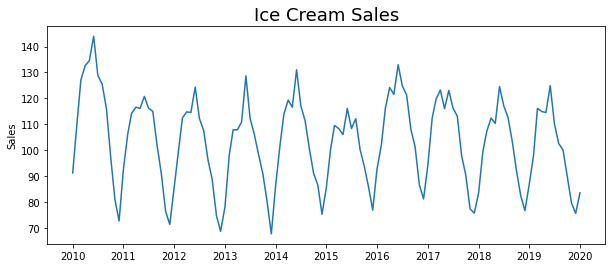

In [11]:
# 数据可视化，呈现明显的季节性
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.IPN31152N)
plt.title('Ice Cream Sales', fontsize=18)
plt.ylabel('Sales')


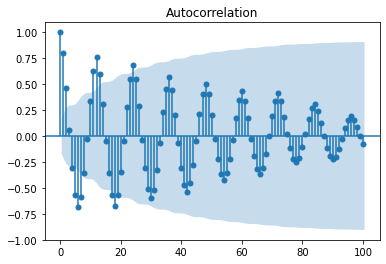

In [12]:
# acf 
acf_plot = plot_acf(df_ice_cream.IPN31152N, lags=100)

蓝色区域为误差范围(Error Band)，区域内的数据被认为是不显著的。图中可见，23个月前的数据自相关性不显著；每间隔5-6个月的夏季和冬季呈负相关，每隔12个月同季呈现正相关。ACF振幅逐步缩小的模式一般意味着存在自相关，具体在哪些周期上自相关，PACF可以帮助我们发现。

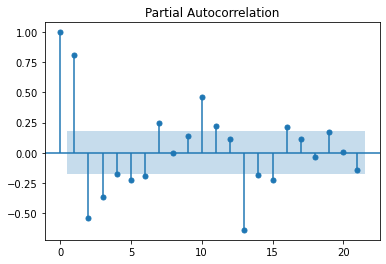

In [13]:
pacf_plot = plot_pacf(df_ice_cream.IPN31152N)

PACF的P表示Partial，与偏导数的P的含义相同——只针对一个变量。ACF考虑所有周期的相关性，PACF则只考虑特定周期的相关性，它给了我们很好的确定自相关周期的起点，上图中，比如1，2，3，10，13可作为自相关时间周期的备选(Candidate)。

在确定ARMA模型的AR部分(p)时，考虑PACF图中不为0(蓝色区域Error Band以外的值，下同)的周期数量。类似的，在确定ARMA模型的MA部分(q)时，考虑ACF图中不为0的周期数量。

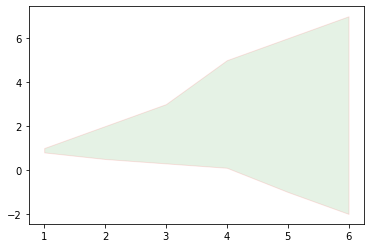

In [19]:
x = pd.Series([1,2,3,4,5,6])
y1 = pd.Series([1,2,3,5,6,7])
y2 = pd.Series([0.8,0.5,0.3,0.1,-1,-2])
plt.fill_between(x, y1,y2, facecolor='green', edgecolor='red',alpha=.1)